In [ ]:
%%capture
import numpy as np # Needed for pandas
import pandas as pd # Used for storing data in DataFrames and performing functions on DataFrame
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # Additional graphing built on top of matplotlib
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.stats import bootstrap
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
from matplotlib.gridspec import GridSpec
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport # Very useful DataFrame report (100x better than .describe())
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/Jeremy1599/Telco_Customer_Churn/main/Telco-Customer-Churn.csv" # Import the dataset

df = pd.read_csv(url) # Create DataFrame variable with the dataset

# Preprocessing

In [ ]:
df.head(7) # Look at the first 7 rows

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  

[7 rows x 21 columns]

In [ ]:
df.info() # Get general info about DataFrame (Columns, Dtype, Non-Null Count, memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


'SeniorCitizen' datatype is int64, but with only 2 values(0,1), it is better suited as a categorical.
*   Some of the other columns also need their datatype changed to categorical based on the # of unique values, which will be checked for next

'TotalCharges' datatype is object, but it is better suited as a float64
*   Object is a string, but 'TotalCharges' is numerical with decimal values, so it should have the same type as 'MonthlyCharges', which is float64
*   Some rows may contain letters or invalid characters instead of numbers, or nothing at all, which would be invalid data. Changing the datatype to float64 will allow us to check for these rows.


### Check unique values of categorical columns

In [ ]:
df.describe(include = [object]) # Shows a list of attributes and # of unique values

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [ ]:
for col in df.select_dtypes(include=[object]): # For loop to iterate through all object attributes
  print(col + ": " + str(df[col].nunique()) + " : " + str(df[col].unique())) # Prints the attribute name, # of unique values, and what these values are

customerID: 7043 : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: 2 : ['Female' 'Male']
Partner: 2 : ['Yes' 'No']
Dependents: 2 : ['No' 'Yes']
PhoneService: 2 : ['No' 'Yes']
MultipleLines: 3 : ['No phone service' 'No' 'Yes']
InternetService: 3 : ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 : ['No' 'Yes' 'No internet service']
OnlineBackup: 3 : ['Yes' 'No' 'No internet service']
DeviceProtection: 3 : ['No' 'Yes' 'No internet service']
TechSupport: 3 : ['No' 'Yes' 'No internet service']
StreamingTV: 3 : ['No' 'Yes' 'No internet service']
StreamingMovies: 3 : ['No' 'Yes' 'No internet service']
Contract: 3 : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 : ['Yes' 'No']
PaymentMethod: 4 : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: 6531 : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: 2 : ['No' 'Yes']


For all object columns, we can see the # of unique values and what these values are. This is to ensure that there isnt any unique value which isnt supposed to be there.

From this info, we can tell that 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', and 'PaymentMethod' need their datatype changed to categorical

## Conversions

### Converting 'SeniorCitizen' to object

In [ ]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({1:'Yes', 0:'No'}) # Maps the values of the attribute to different values
df["SeniorCitizen"] = df["SeniorCitizen"].astype('category') # Convert Dtype of attribute to categorical

After using the map function, the column datatype is automatically converted to bool, which is then converted to categorical.

In [ ]:
df["SeniorCitizen"].dtype # Checks Dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

*Datatype of 'SeniorCitizen' has been successfully changed*

### Converting 'TotalCharges' to float64

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce') # Convert Dtype of attribute to numeric (Float64)

I had to include the parameter '
errors='coerce' ', which alters invalid data to 'NaN', otherwise the function would bring up: '
ValueError: Unable to parse string " " at position 488', which shows that atleast 1 row, row 489, has invalid data

In [ ]:
df["TotalCharges"].dtype # Checks Dtype

dtype('float64')

*Datatype of 'TotalCharges' has been successfully changed*

### Converting the rest

In [ ]:
for x in df.select_dtypes(exclude=[np.number]): # For loop to iterate through all attributes that arent a numerical Dtype
  df[x] = df[x].astype('category') # Convert Dtype of attribute to categorical

In [ ]:
df.dtypes # Get Dtypes of all attributes in DataFrame

customerID          category
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

## Data cleaning

### Check for duplicate rows

In [ ]:
df.duplicated().sum() # Checks for duplicates

0

There is no customer with duplicate records, so the 'customerID' column can now be removed as it wont be needed for analysis

In [ ]:
df = df.drop(["customerID"], axis=1) # Removes the 'customerID' attribute and values

### Check for missing values

In [ ]:
df.isnull().sum() # Checks for # of null values per attribute

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*TotalCharges contains 11 missing values, so these rows will be removed from the DataFrame*



In [ ]:
df[df["TotalCharges"].isnull()] # Prints the rows with missing values

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           NaN    No  


These are the 11 rows that contain a NaN value under 'TotalCharges'.

Every row with a missing value for TotalCharges also has a value of 0 for tenure. For this reason we can assume that the customer canceled their subscription before their MonthlyPayment was due, which is why the TotalCharges is NaN.

If a tenure value was present which wasnt 0, we would use the central tendency of tenure multiplied by MonthlyCharges to get an approximation of TotalCharges.

In [ ]:
df = df.dropna() # Removes all rows with missing values
df.isnull().sum() # Checks for # of null values per attribute

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Rows with 'NaN' values successfully removed

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [ ]:
df.to_csv('churn.csv',index=False) # Exportation of the preprocessed data

# EDA

In [ ]:
df.describe() # Prints measures of central tendency and quartiles

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

In [ ]:
# DISABLED FOR NOW CAUSE IT TAKES TOOOOO DAMN LONG TO GENERATE!!!!!!
# Uncomment the lines below if you need to.

profile = ProfileReport(df) # Generates a report that displays useful information about DataFrame
profile # Display the report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Initial exploration

In [ ]:
def churnCategorical(col): # Function for plotting categorical variables vs Churn
  fig, ax = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios': [1.5, 1]}) # Creates subplot with dimensions and sizes
  # Create histplot and edit features
  fig.suptitle(t=col + " vs Churn",size="x-large",x=.35,weight="semibold") # Sets the title and font size/ of the count plot
  sns.countplot(x = col, hue = "Churn", data = df, ax=ax[0]) # Creates the count plot
  # Create pieplot and edit features
  plt.title(col, fontsize=15) # Sets the title of the pie plot
  df.groupby(col).size().plot(kind="pie",autopct='%.2f', ax=ax[1]) # Creates the pie plot

  ax[1].set_ylabel(None) # Removes the y label for the pie plot

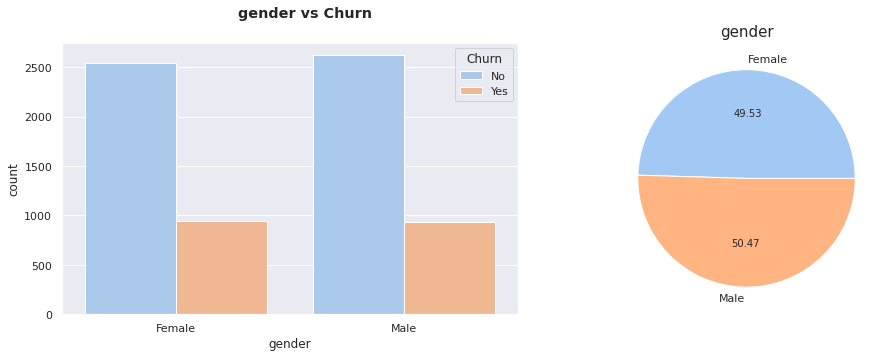

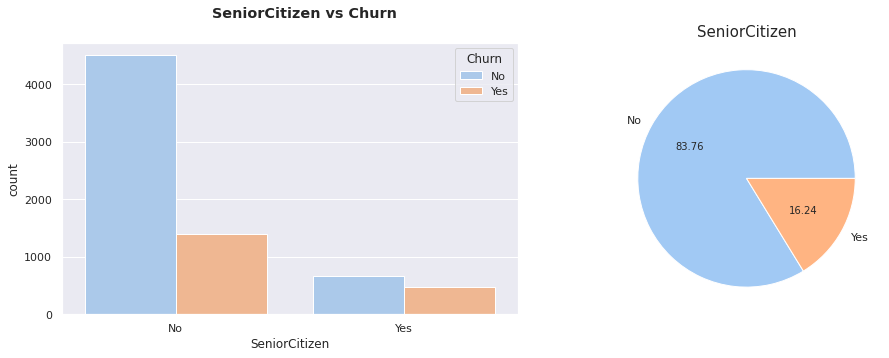

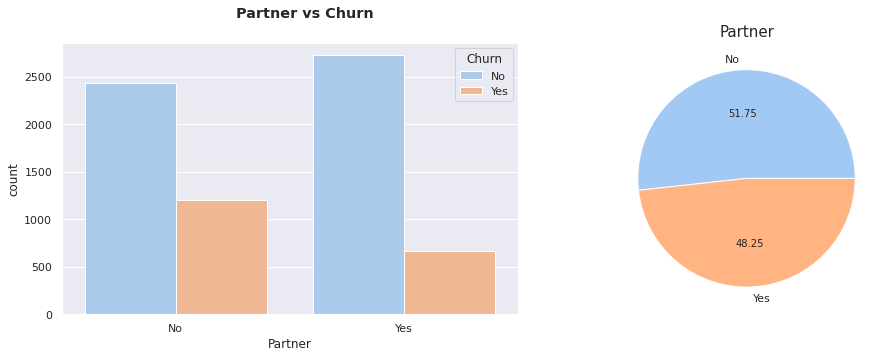

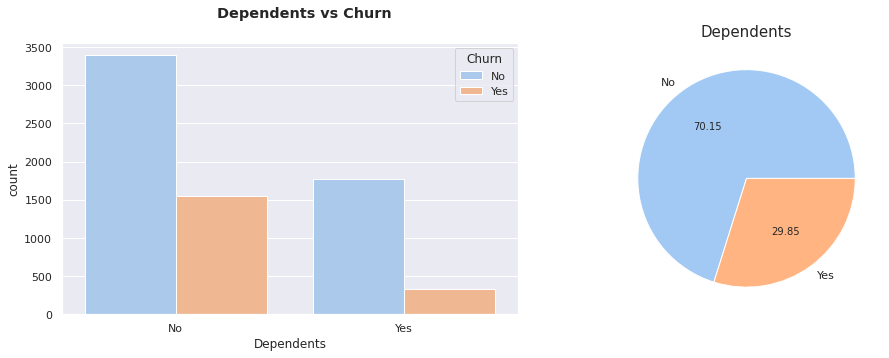

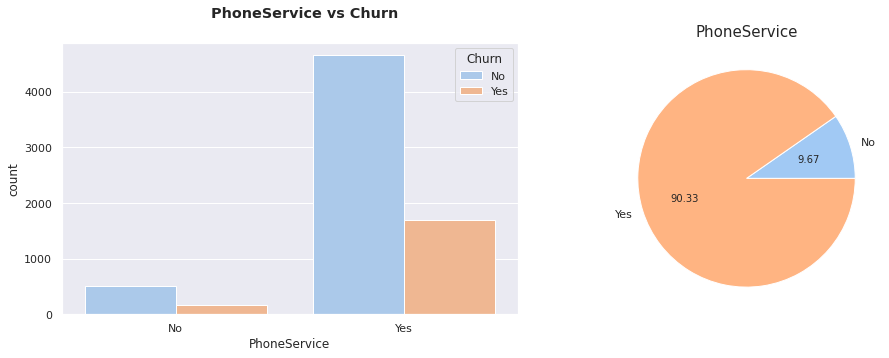

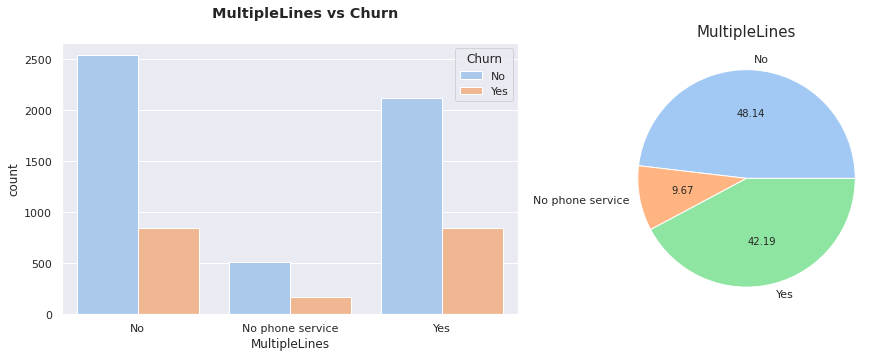

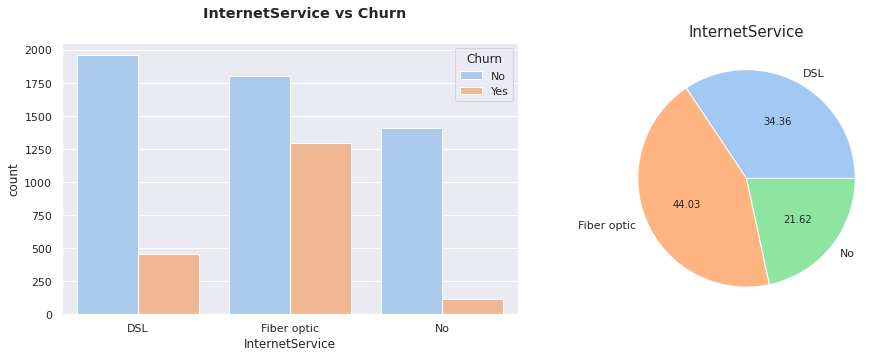

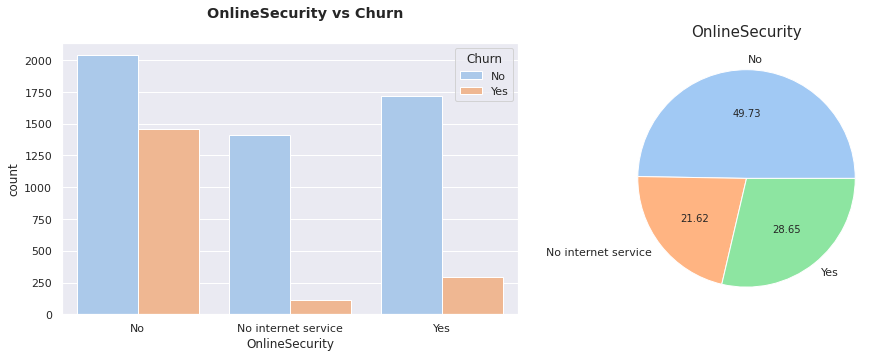

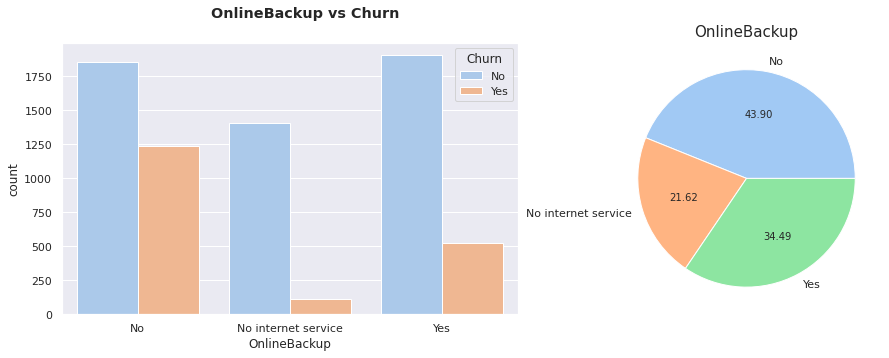

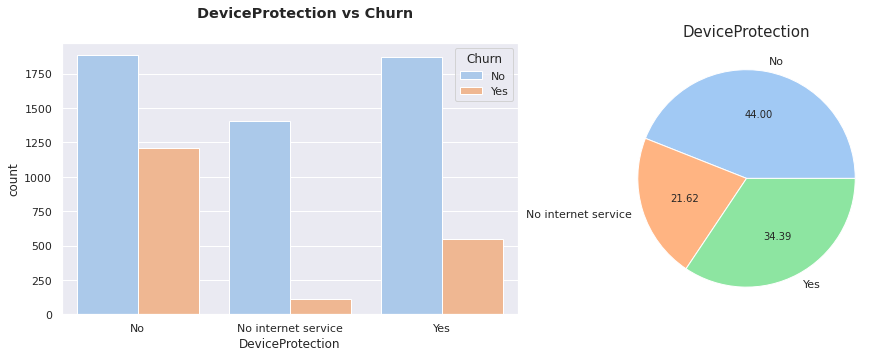

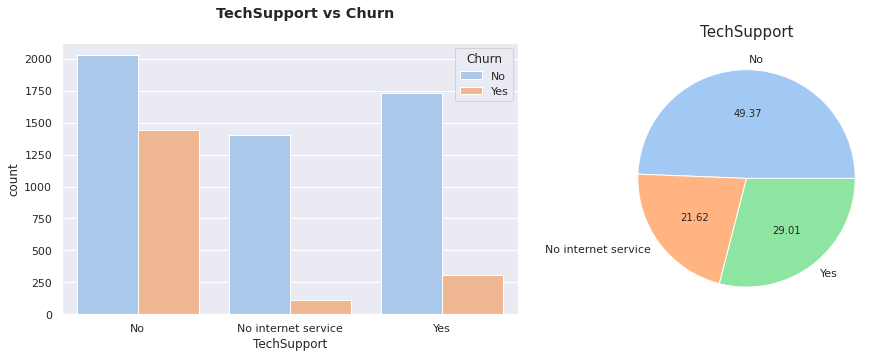

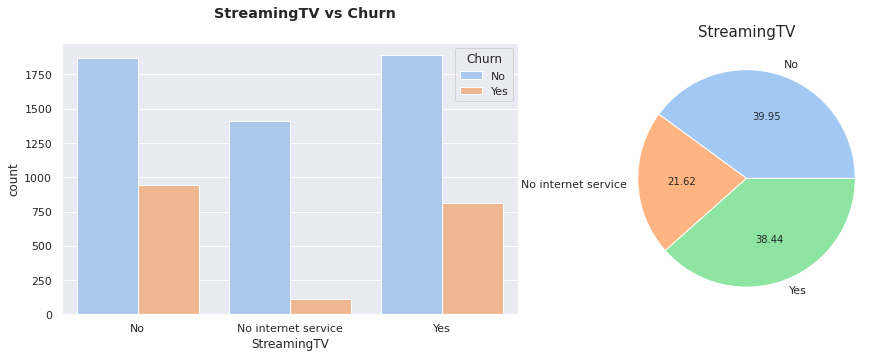

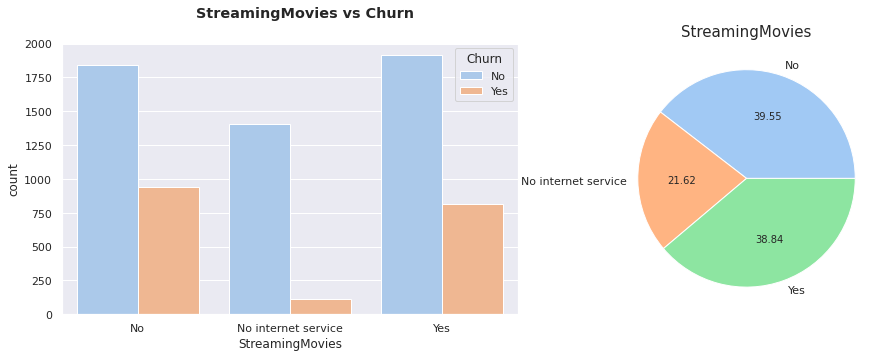

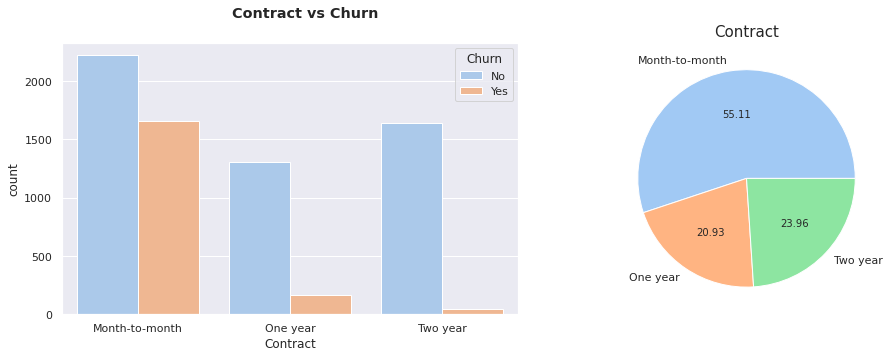

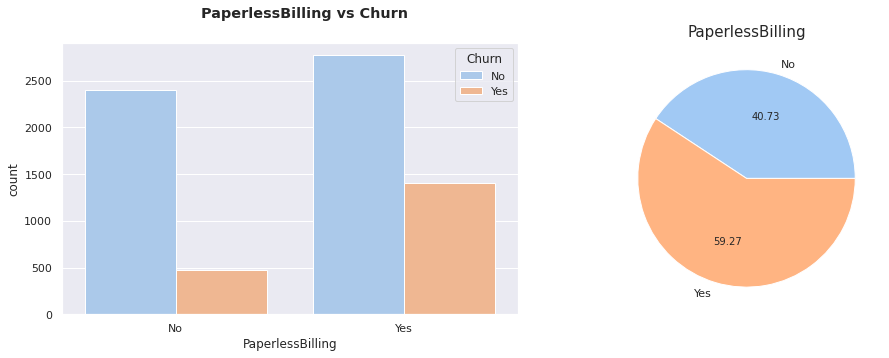

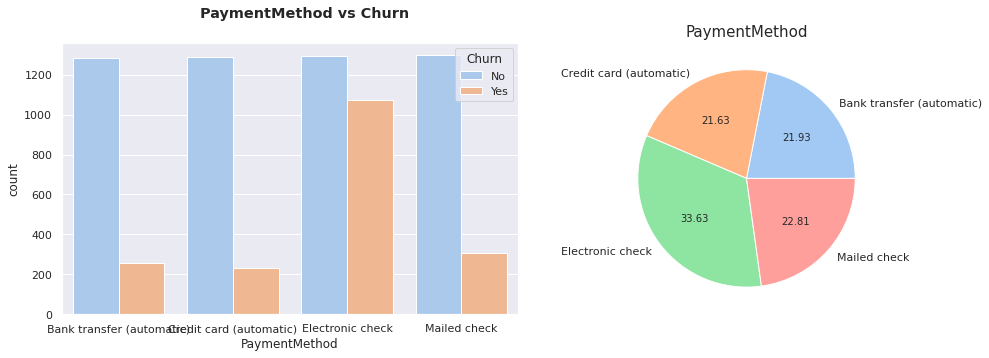

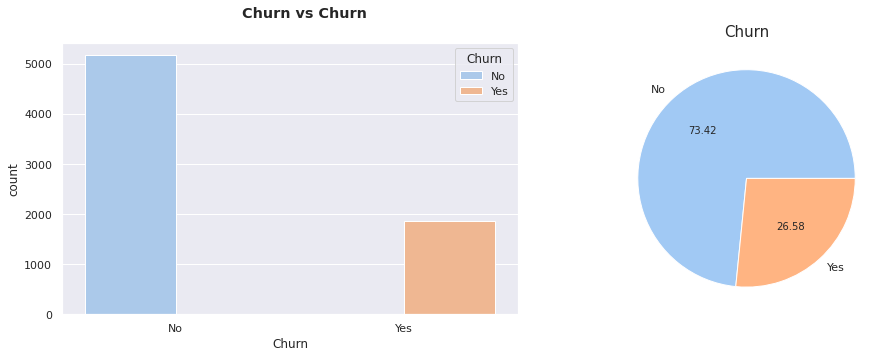

In [ ]:
sns.set_palette("pastel") # Sets colore pallete of graphs
for col in df.select_dtypes(exclude=[np.number]): # For loop to iterate through all attributes that arent a numerical Dtype
  churnCategorical(col)

## Correlation

### Pearson's coefficient of numerical attributes

In [ ]:
# Checking correlation between categorical attributes and churn
for col in df.select_dtypes(include=[np.number]): # for all datatypes that are np.number
  if(col != 'tenure'): # if the column isnt tenure
    correlation,_ = stats.pearsonr(df[col],df['tenure']) # Apply correlation function to the column
    print(col + ' vs tenure: %.2f' % (correlation*100) + "%") # Print correlation results

correlation,_ = stats.pearsonr(df['TotalCharges'],df['MonthlyCharges'])
print('TotalCharges vs MonthlyCharges: %.2f' % (correlation*100) + "%")
correlation,_ = stats.pearsonr((df['TotalCharges']/df['MonthlyCharges']),df['tenure'])
print('(TotalCharges / MonthlyCharges) vs tenure: %.2f' % (correlation*100) + "%")

MonthlyCharges vs tenure: 24.69%
TotalCharges vs tenure: 82.59%
TotalCharges vs MonthlyCharges: 65.11%
(TotalCharges / MonthlyCharges) vs tenure: 99.89%


There is a significant corelation between TotalCharges and tenure, much more so than MonthlyCharges and tenure. The correlation between TotalCharges and MonthlyCharges is somewhat significant, as the value is above 50%

When we get the value of TotalCharges and divide it by the value of MonthlyCharges, we see that the correlation to tenure is 99.89%. Dividing TotalCharges by MonthlyCharges should result in a similar result to tenure, which is proven through the correlation coefficient of 99.89%

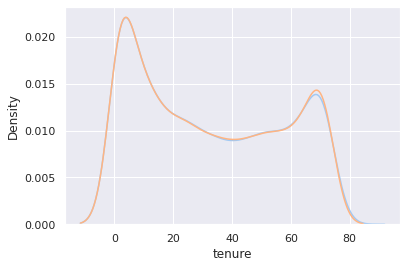

In [ ]:
sns.kdeplot(x=(df['TotalCharges']/df['MonthlyCharges']), data=df) # Plotting of (TotalCharges/MonthlyCharges)
sns.kdeplot(x=df['tenure'], data=df) # Plotting of tenure on the same graph

### Mutual Info Score of categoricals

In [ ]:
# Function to calculate Mutual Info Score and graph it
def mifCategorical(atrTarget, *args):
  corr = [] # Creation of correlation array
  for col in df.select_dtypes(exclude=(np.number)): # for all categorical columns
    corr.append(mutual_info_score(df[col], df[atrTarget])) # Append the Mutual Info Score to the corr array
  df2 = pd.Series(data=corr, index=df.select_dtypes(exclude=(np.number)).columns) # Apply values from corr array to df2 DataFrame
  df2 = df2.drop(labels=[*args]) # Drop columns based on *args
  df2.sort_values(ascending=False) # Sort values in reverse ascending order

  sns.set(rc={'figure.figsize':(15,8)}) # Set size of the figure
  sns.barplot(y=df2.sort_values(ascending=False).index, x=df2.sort_values(ascending=False).values).set(title='Mutual info score of categorical attributes vs ' + atrTarget)

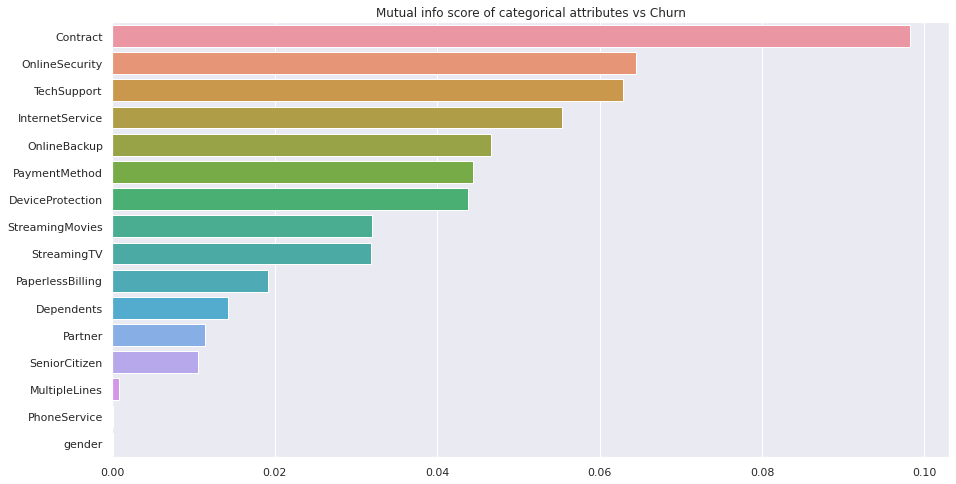

In [ ]:
mifCategorical('Churn', 'Churn') # Calling the mifCategorical function on target variable Churn

Attributes that correlate the most with churn is Contract, OnlineSecurity, TechSupport, InternetService, and OnlineBackup. 4 of these attributes are optional services that are provided by the company, with the other(Contract) being the biggest factor in terms of tenure AND churn. These 5 attributes will be looked at in more detail.

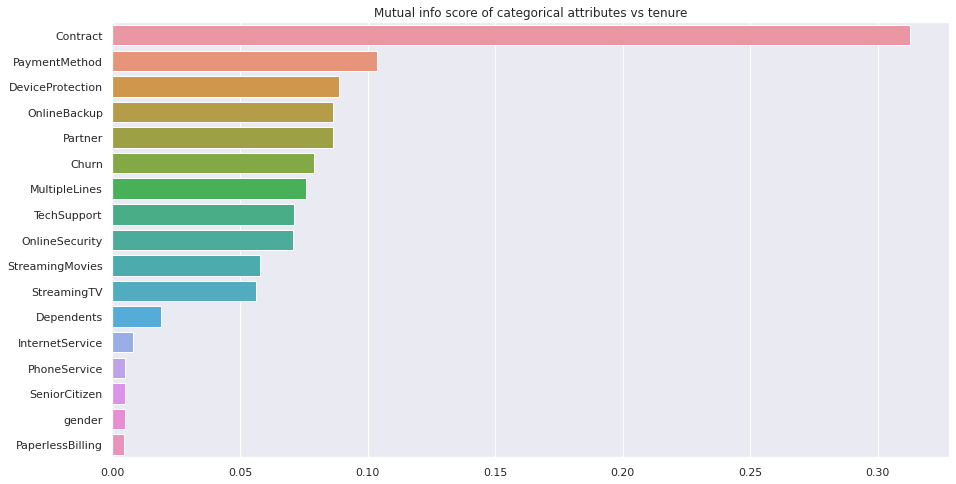

In [ ]:
mifCategorical('tenure') # Calling the mifCategorical function on variable tenure

As mentioned above, Contract is the biggest factor in terms of correlation with tenure AND Churn. Now we can see that it is indeed the case. In both graphs, the attribute with the most correlation has been Contract by a long shot.

In terms of tenure, Contract correlates heavily with tenure in comparison to the other attributes, which is not as much the case with Churn.

Contract correlates 3x as much with tenure than it does with Churn.

The top 5 attributes that correlate with Churn and tenure are somewhat differnt. So these attributes are also worth taking a look at further.

### Pearson's coefficient of categoricals

In [ ]:
# Function to calculator Pearson's r for all categorical variables
def pearsonCategorical(atrTarget):
  corr = [] # Creation of correlation array
  ec = pd.get_dummies(df) # Creation of dummy variables
  for col in ec.select_dtypes(include=['uint8']).drop(labels=['Churn_Yes','Churn_No'], axis=1): # for all columns that arent Churn
    correlation,_ = stats.pearsonr(ec[col], ec[atrTarget]) # Apply Pearson's r and obtain correlation value
    corr.append(correlation) # Append value obtained above to the corr array

  df2 = pd.Series(data=corr, index=ec.select_dtypes(include=['uint8']).drop(labels=['Churn_Yes','Churn_No'], axis=1).columns) # Apply values from corr array to df2 DataFrame
  df2.sort_values(ascending=False) # Sort values in reverse ascending order

  sns.set(rc={'figure.figsize':(15,12)}) # Set size of the figure
  sns.barplot(y=df2.sort_values(ascending=False).index, x=df2.sort_values(ascending=False).values).set(title='Pearsons correlation coefficient vs ' + atrTarget)
  plt.show()

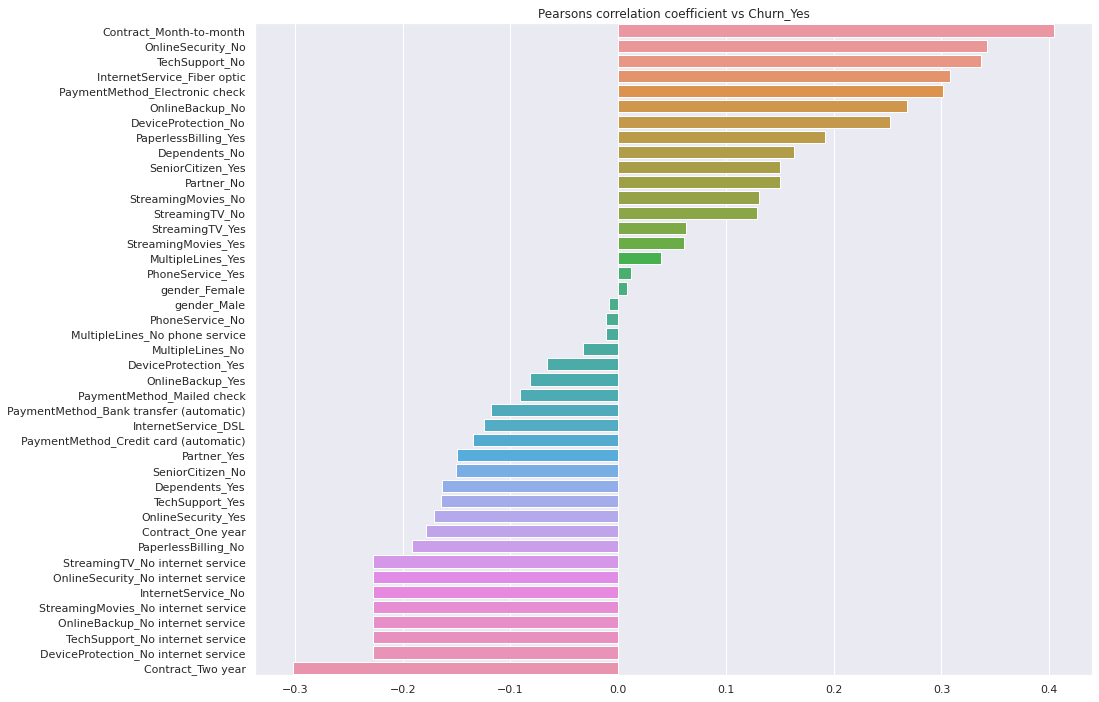

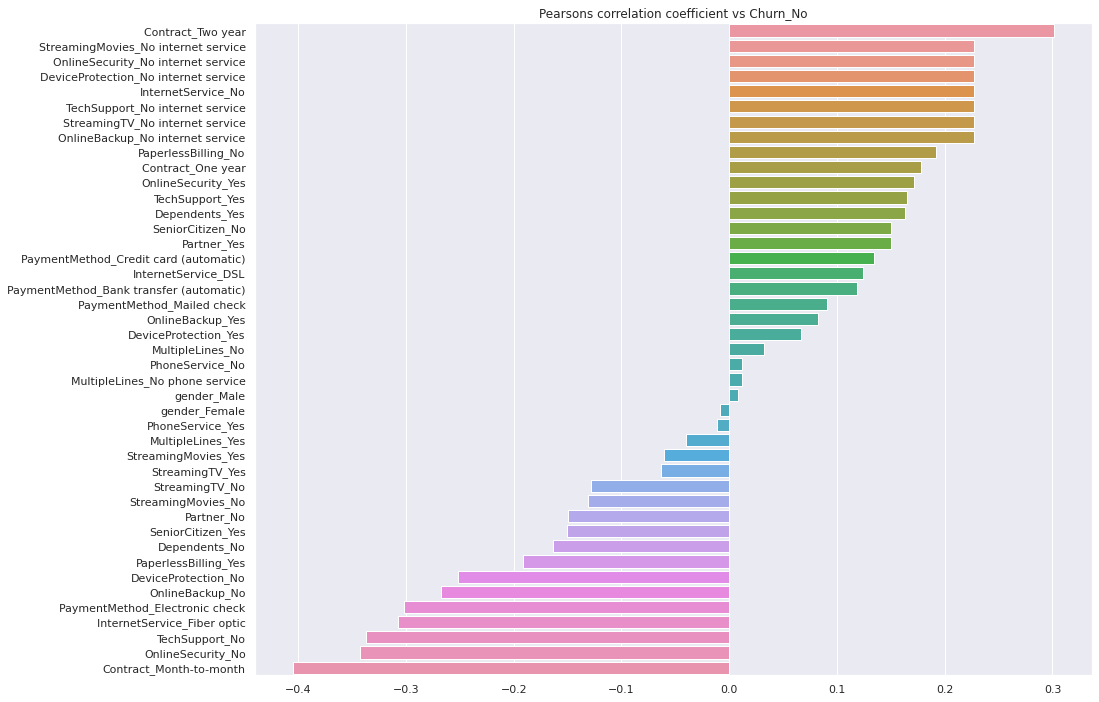

In [ ]:
pearsonCategorical('Churn_Yes') # Calling the PearsonCategorical function for Churn_Yes
pearsonCategorical('Churn_No') # Calling the PearsonCategorical function for Churn_No

## Distribution plots

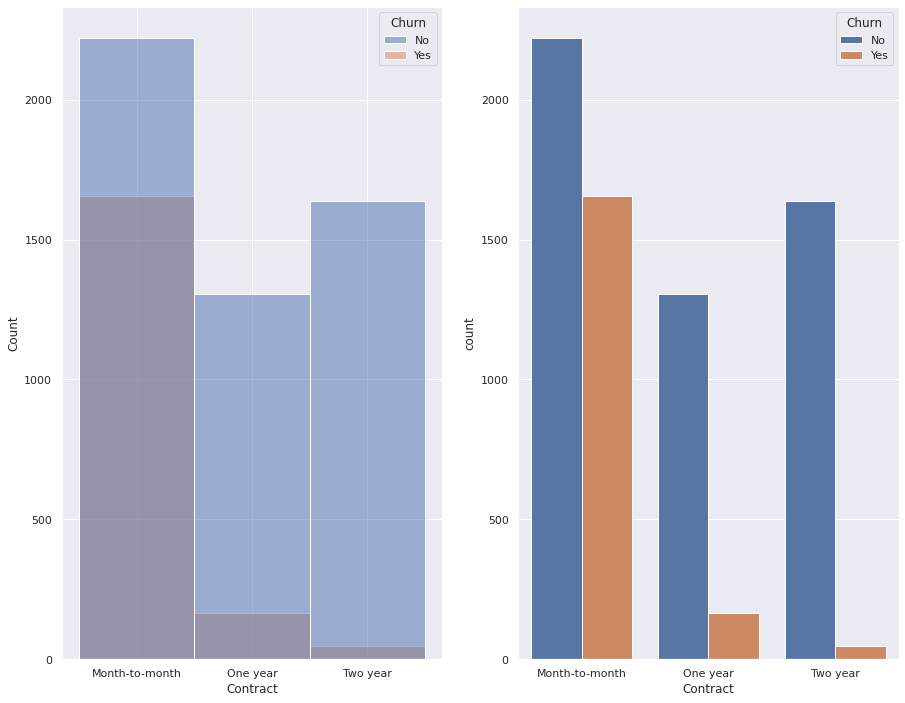

In [ ]:
fig, ax = plt.subplots(1,2) # Setup of the figure and subplots
sns.histplot(x='Contract', hue='Churn', data=df, ax=ax[0]) # Plotting of Contract in relation to Churn
sns.countplot(x='Contract', hue='Churn', data=df, ax=ax[1]) # Plotting of Contract in relation to Churn

### Distribution of each numerical column in relation to churn

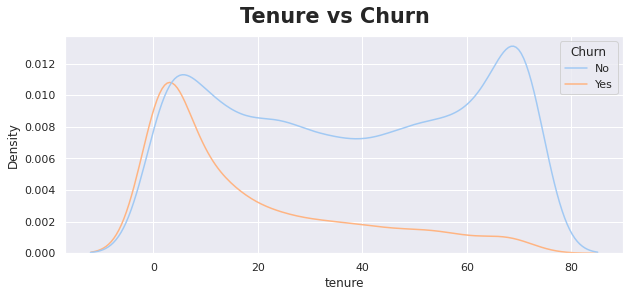

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
fig.suptitle('Tenure vs Churn', size='xx-large', fontweight='bold') # Set title to column name
sns.kdeplot(x='tenure', hue='Churn', data=df) # KDE plot of column in relation to Churn

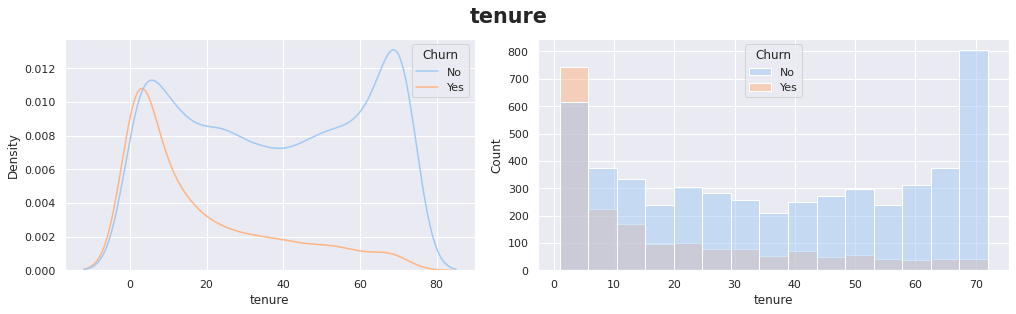

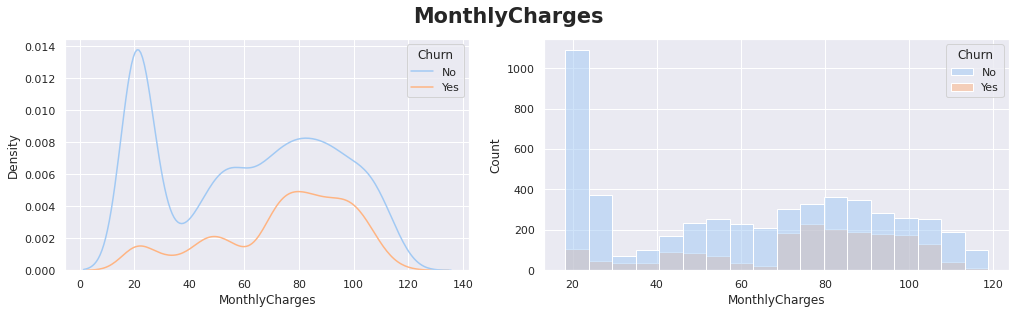

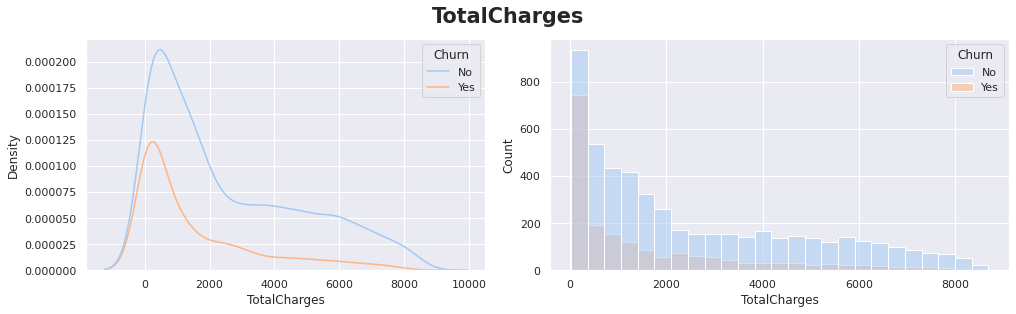

In [ ]:
sns.set_palette("pastel") # Sets colore pallete of graphs

for col in df.select_dtypes(include = [np.number]): # For all numerical columns
  fig, ax = plt.subplots(1,2, figsize=(14,4.25), constrained_layout=True, gridspec_kw={'width_ratios': [1, 1.15]}) # Setup of figure and subplots
  fig.suptitle(col, size='xx-large', fontweight='bold') # Set title to column name

  sns.kdeplot(x=col, hue='Churn', data=df, ax=ax[0]) # KDE plot of column in relation to Churn

  sns.histplot(x=col, hue='Churn', data=df, ax=ax[1]) # Hist plot of column in relation to Churn


One thing we can emmediately see from the tenure figure is that, while customers with low tenure are equally likely to churn or not churn, customers with a higher tenure are more likely to not churn.

### Distribution/relation between attribute, tenure, and Churn

In [ ]:
# Function to graph categorical variables to tenure and Churn
def tenureChurnCategorical(col):
  sns.set_palette("pastel") # Sets colore pallete of graphs
  # sns.set(rc= {'figure.figsize':(18,7.5)})
  fig = plt.figure(constrained_layout=True, figsize=(16.4,7.7)) # Setup of figure and its size
  gs = GridSpec(2,4, figure=fig) # Setup of gridspec
  ax1= fig.add_subplot(gs[0, :2]) # Assigning subplots and their size
  ax2= fig.add_subplot(gs[0, 2:]) # Assigning subplots and their size
  ax3= fig.add_subplot(gs[1, :-2]) # Assigning subplots and their size
  ax4= fig.add_subplot(gs[1, 2]) # Assigning subplots and their size
  ax5= fig.add_subplot(gs[1, 3]) # Assigning subplots and their size

  fig.suptitle(t=col + " vs tenure & Churn", fontsize="xx-large",weight="semibold") # Sets the title and font size/ of the count plot

  ax1.set_title('tenure / ' + col) # Sets the title of the kde plot
  sns.kdeplot(x='tenure', hue=col, data=df, ax=ax1)

  ax2.set_title('tenure / ' + col) # Sets the title of the kde plot
  sns.histplot(x='tenure', hue=col, data=df, ax=ax2)

  ax3.set_title(col + ' / Churn') # Sets the title of the count plot
  sns.countplot(x = col, hue = "Churn", data = df, ax=ax3) # Creates the count plot

  ax4.set_title(col + '/NoChurn') # Sets the title of the pie plot
  df[df['Churn'].values == 'No'].groupby(col).size().plot(kind="pie",autopct='%.2f', ax=ax4) # Creates the pie plot
  ax4.set_ylabel(None) # Removes the y label for the pie plot

  ax5.set_title(col + '/Churn') # Sets the title of the pie plot
  df[df['Churn'].values == 'Yes'].groupby(col).size().plot(kind="pie",autopct='%.2f', ax=ax5) # Creates the pie plot
  ax5.set_ylabel(None) # Removes the y label for the pie plot
  fig.show()

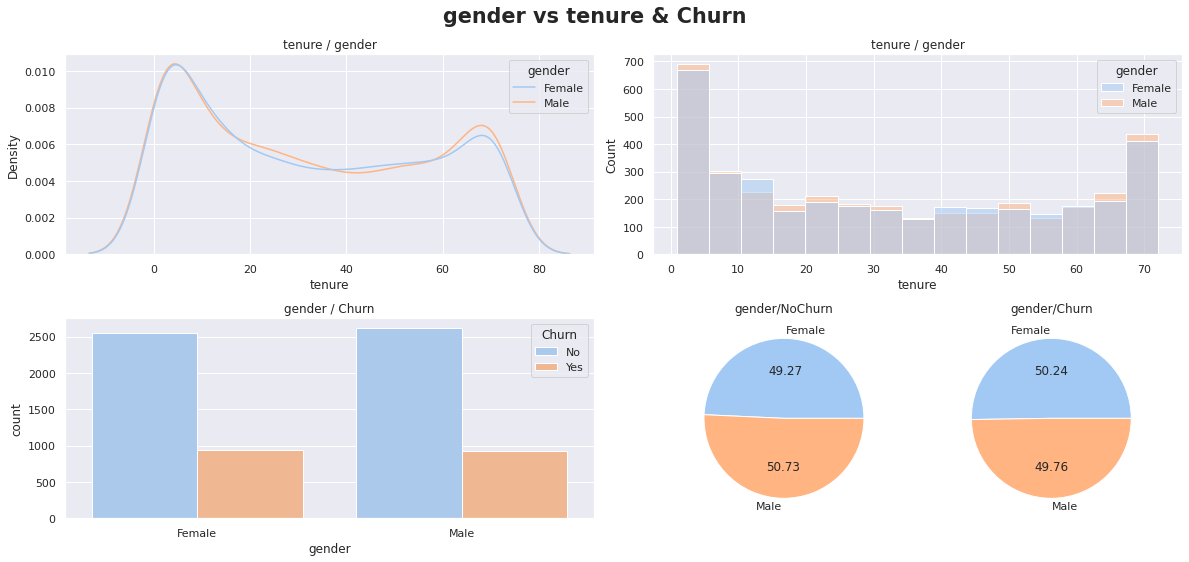

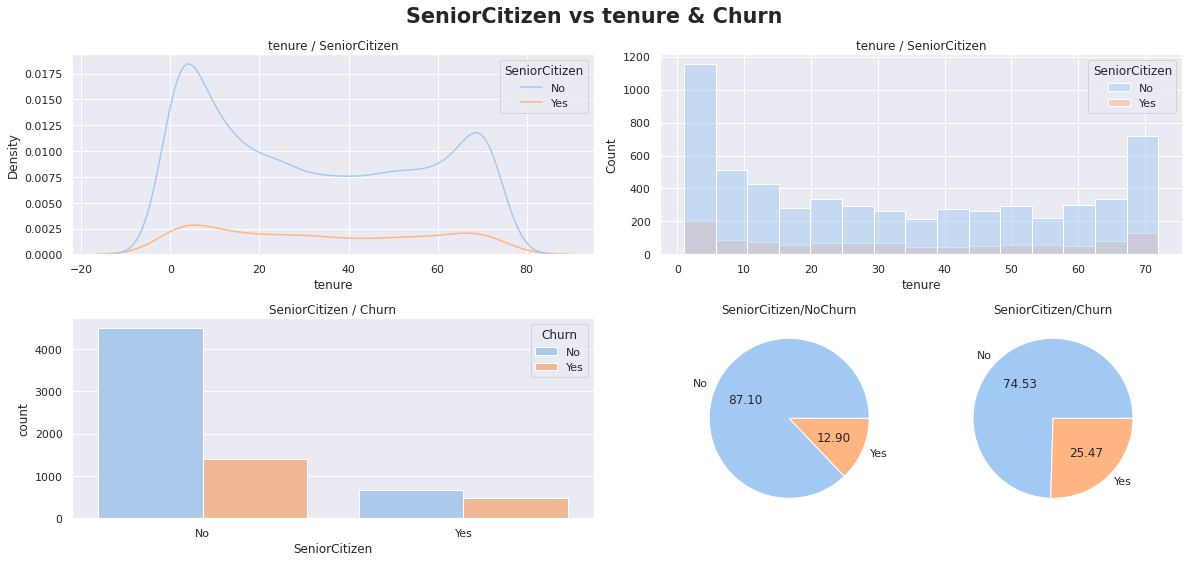

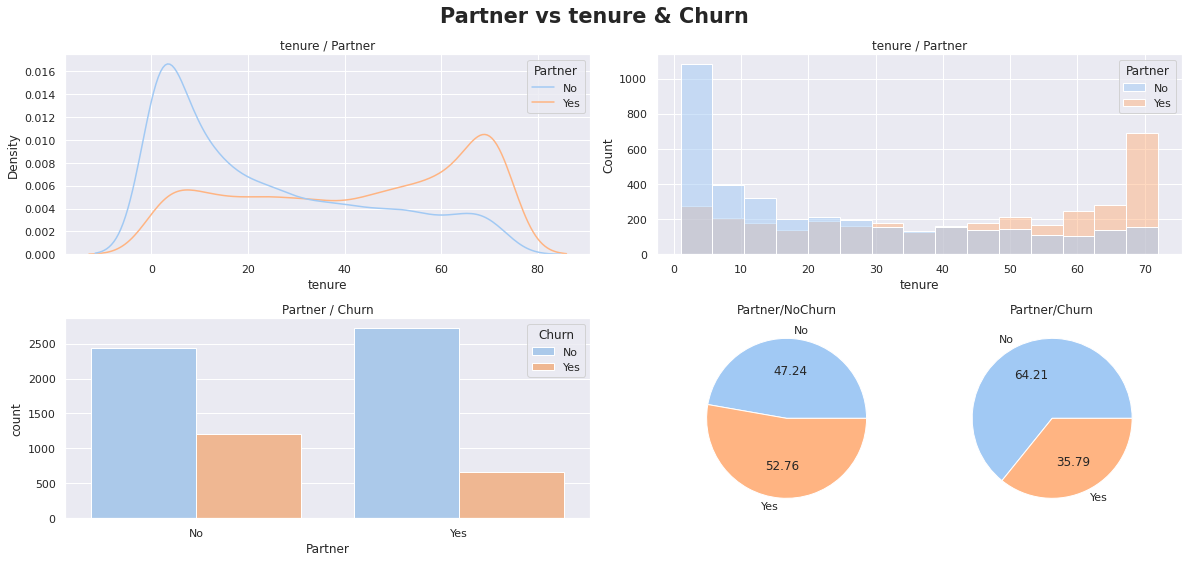

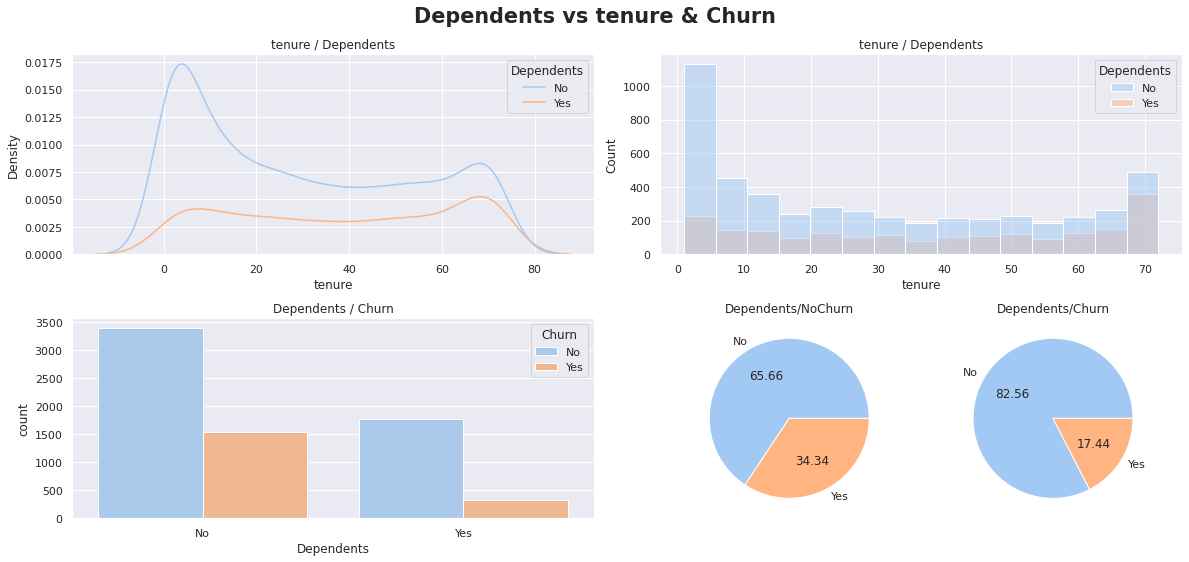

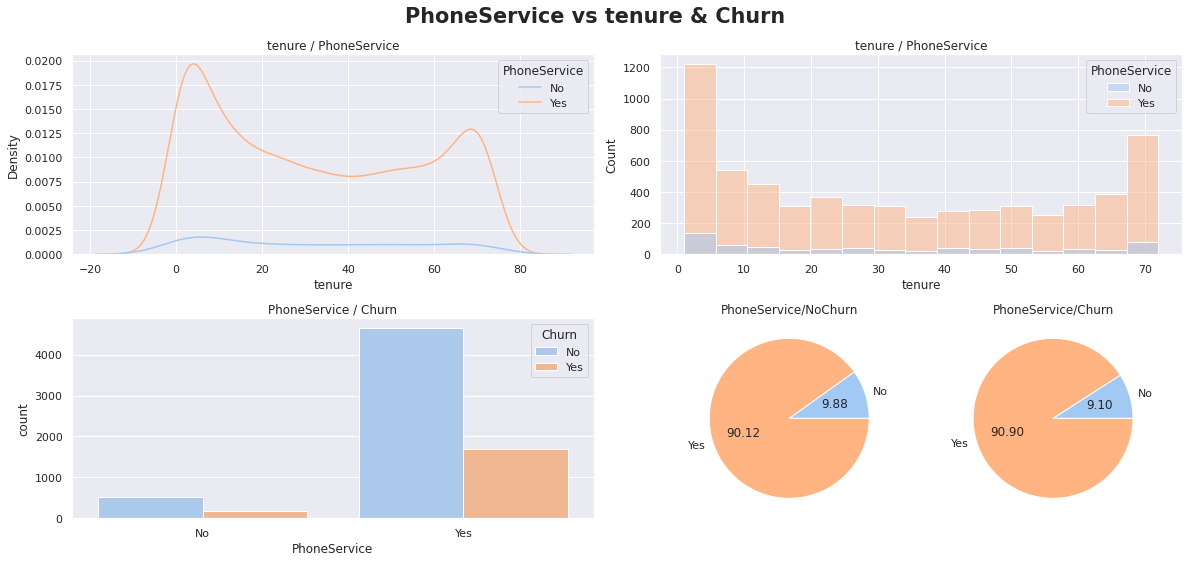

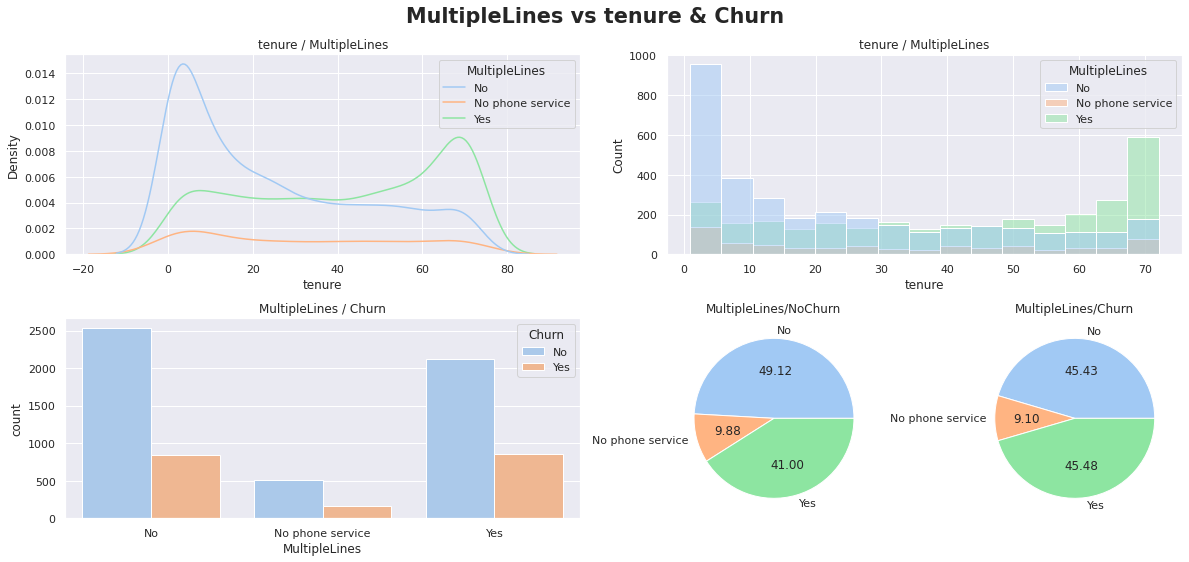

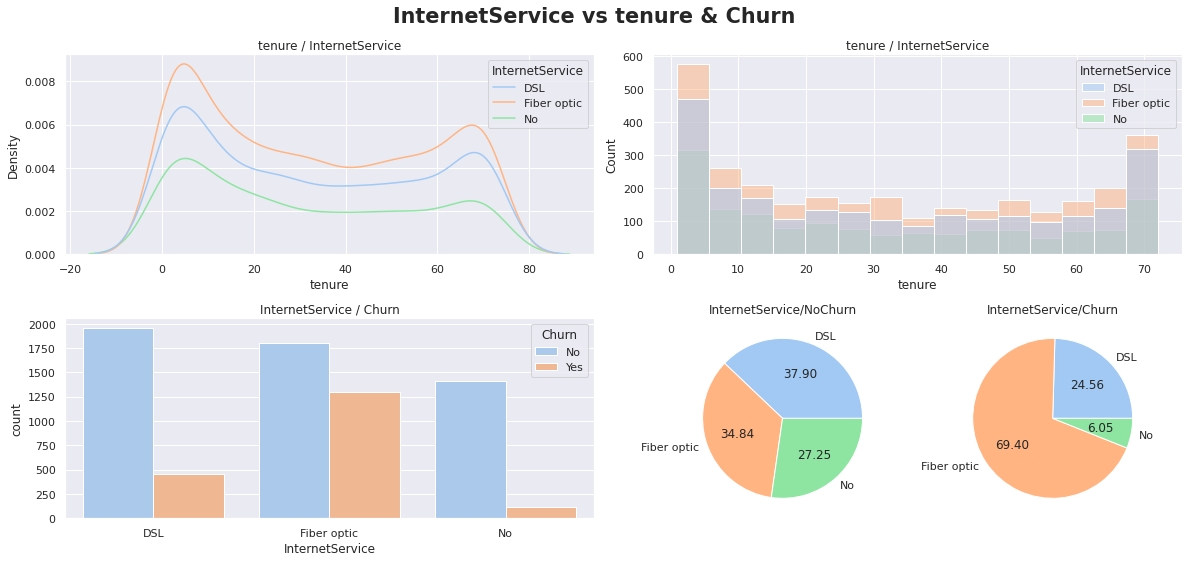

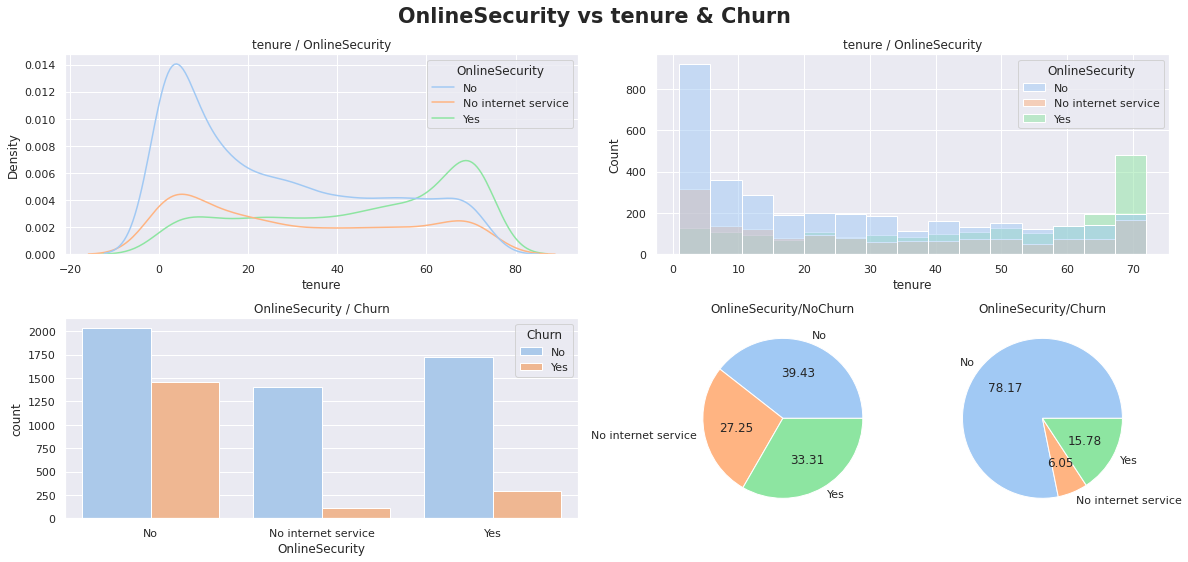

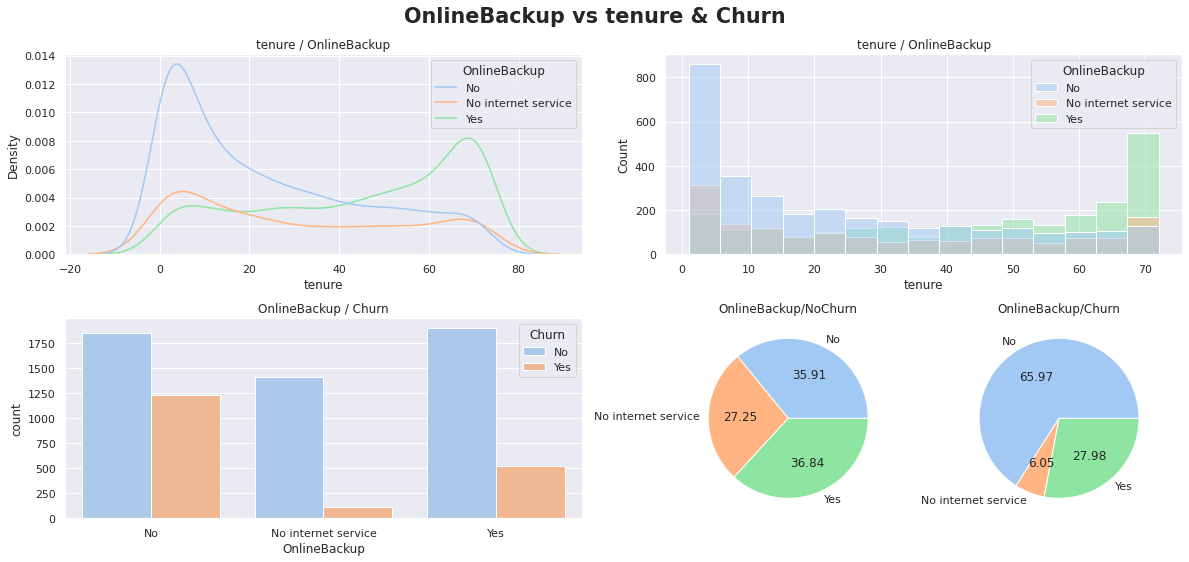

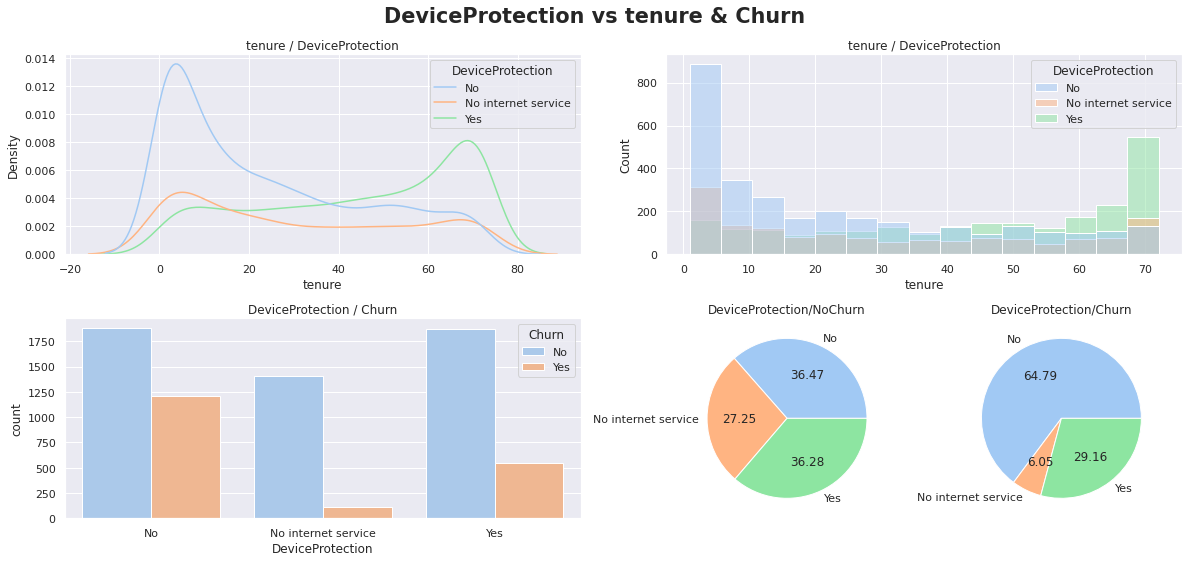

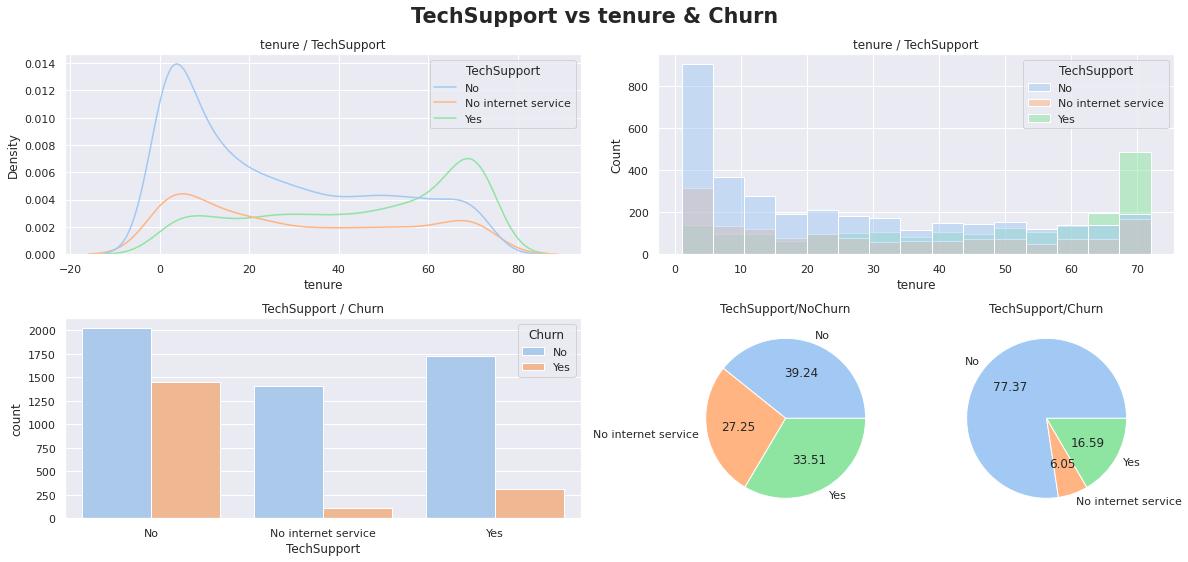

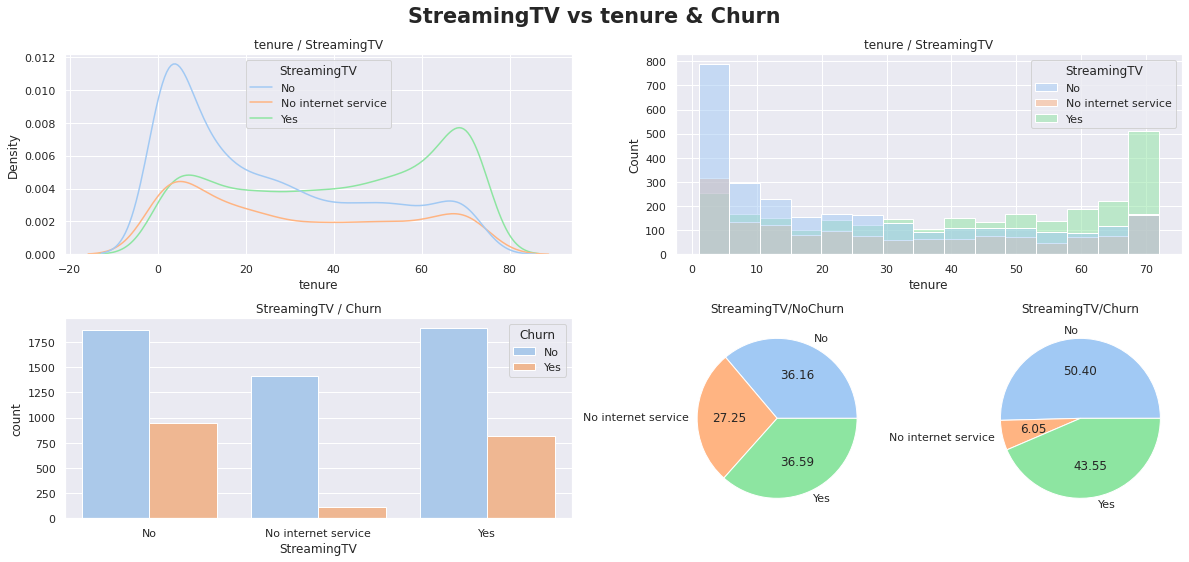

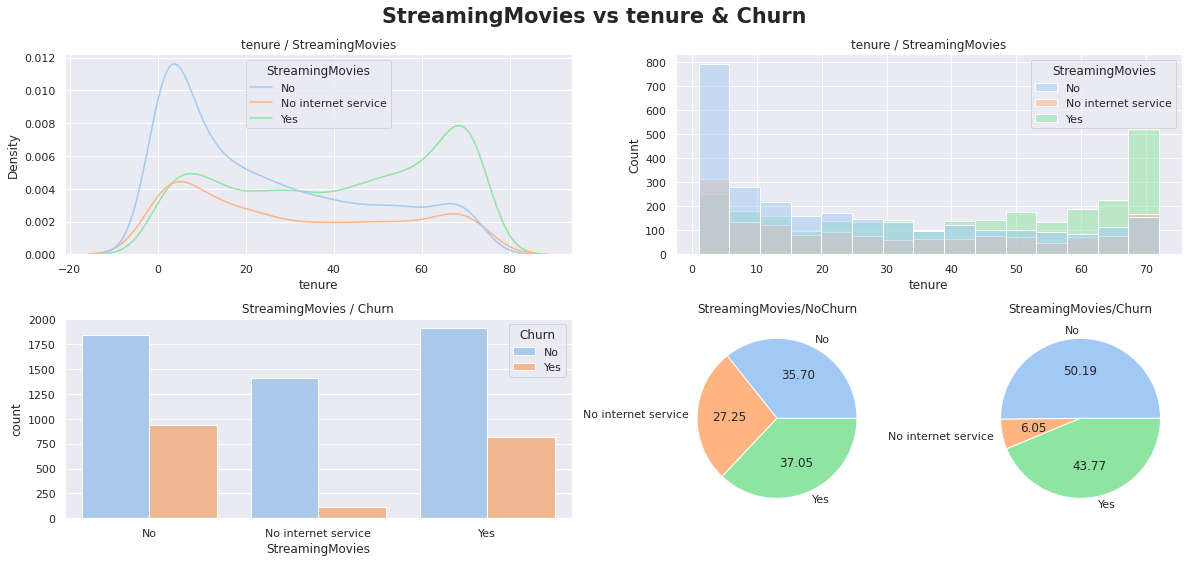

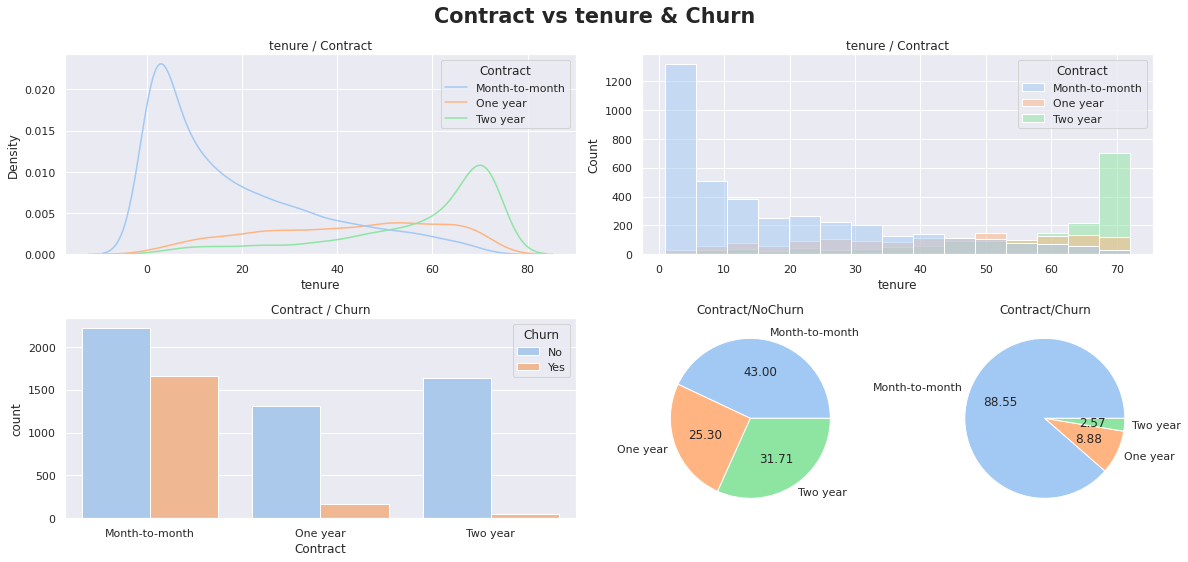

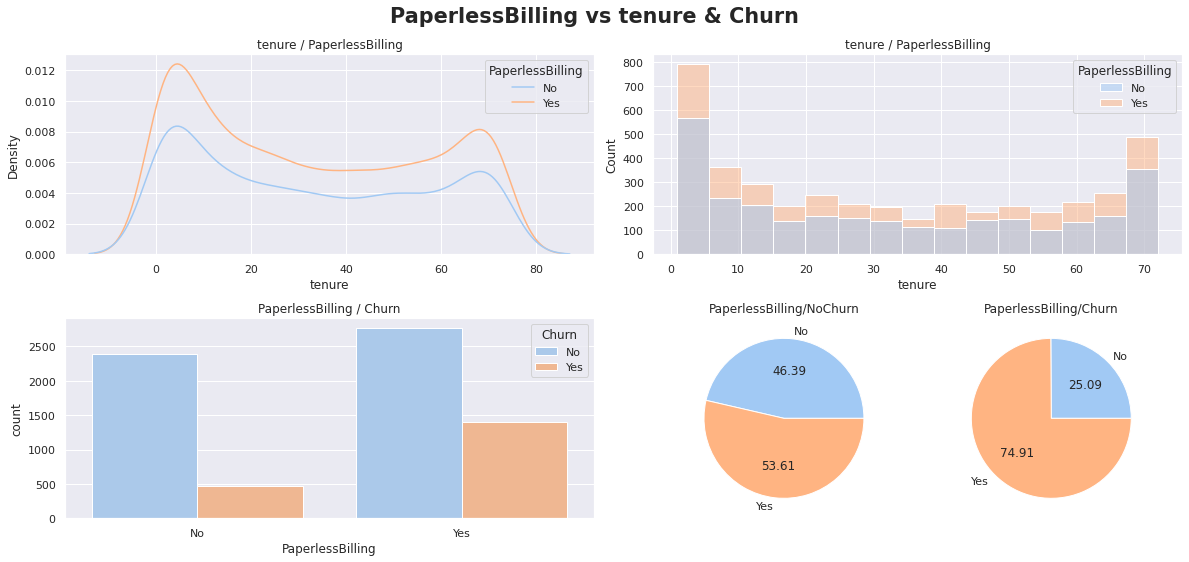

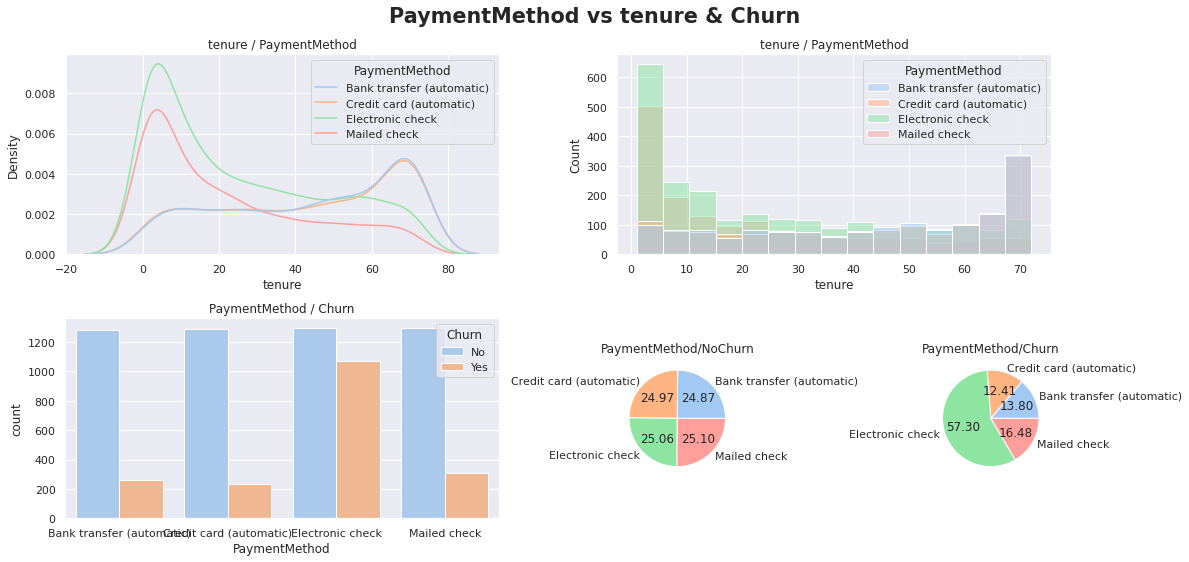

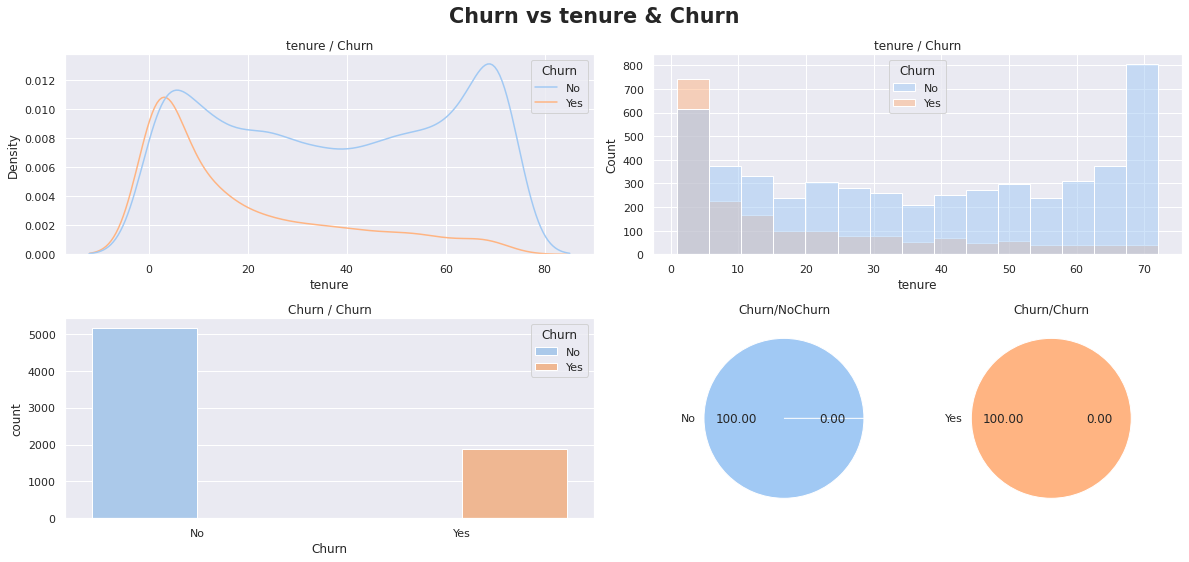

In [ ]:
for col in df.select_dtypes(exclude=[np.number]): # For loop to iterate through all categorical features
    if (df[col].nunique() < 5 and df[col].nunique() > 1): # Checks if feature has 2-4 unique values
      tenureChurnCategorical(col) # Call to the graphing function to calculate graphs in relation to churn and tenure

Customers with a Two Year contract are more likely to have more tenure, which means higher TotalCharges. most customers likely to have a low tenure also have a Month-to-month contract, and majority of customers with low tenure are churned.

From these graphs we can tell that there is a strong correlation between Contract type and Churn

## Creation of dummy variables

In [ ]:
dfDummies = pd.get_dummies(df) # calling get_dummies function on DataFrame
dfDummies = dfDummies.drop(columns=['Churn_No']) # Drop Churn_No, Churn will be under one column instead of 2
dfDummies = dfDummies.rename(columns={'Churn_Yes': 'Churn'}) # Change Churn_yes to Churn
dfDummies.head() # View head of DataFrame

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0       1           29.85         29.85              1            0   
1      34           56.95       1889.50              0            1   
2       2           53.85        108.15              0            1   
3      45           42.30       1840.75              0            1   
4       2           70.70        151.65              1            0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                 1                  0           0            1   
1                 1                  0           1            0   
2                 1                  0           1            0   
3                 1                  0           1            0   
4                 1                  0           1            0   

   Dependents_No  ...  Contract_Month-to-month  Contract_One year  \
0              1  ...                        1                  0   
1              1  ...                        0                  1   
2              1  ...                        1                  0   
3              1  ...                        0                  1   
4              1  ...                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  Churn  
0                           0      0  
1                           1      0  
2                           1      1  
3                           0      0  
4                           0      1  

[5 rows x 47 columns]

In [ ]:
x = dfDummies.drop(columns = ['Churn']) # Assign variable to be trained
y = dfDummies['Churn'].values # Assign target variable, Churn

In [ ]:
# Scaling all values to 0-1, categorical values had already been changed before
# this, but with this method the numerical values will also be scaled
features = x.columns.values # store array of features
min_max_scaler = MinMaxScaler() # Setup of MinMaxScaler
min_max_scaler.fit_transform(x) # Scaling of data
x = pd.DataFrame(min_max_scaler.transform(x)) # Scaling and applying to x variable
x.columns = features # Apply feature names to respective column
x.head() # View head of DataFrame x

tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0  0.000000        0.115423      0.001275            1.0          0.0   
1  0.464789        0.385075      0.215867            0.0          1.0   
2  0.014085        0.354229      0.010310            0.0          1.0   
3  0.619718        0.239303      0.210241            0.0          1.0   
4  0.014085        0.521891      0.015330            1.0          0.0   

   SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0               1.0                0.0         0.0          1.0   
1               1.0                0.0         1.0          0.0   
2               1.0                0.0         1.0          0.0   
3               1.0                0.0         1.0          0.0   
4               1.0                0.0         1.0          0.0   

   Dependents_No  ...  StreamingMovies_Yes  Contract_Month-to-month  \
0            1.0  ...                  0.0                      1.0   
1            1.0  ...                  0.0                      0.0   
2            1.0  ...                  0.0                      1.0   
3            1.0  ...                  0.0                      0.0   
4            1.0  ...                  0.0                      1.0   

   Contract_One year  Contract_Two year  PaperlessBilling_No  \
0                0.0                0.0                  0.0   
1                1.0                0.0                  1.0   
2                0.0                0.0                  0.0   
3                1.0                0.0                  1.0   
4                0.0                0.0                  0.0   

   PaperlessBilling_Yes  PaymentMethod_Bank transfer (automatic)  \
0                   1.0                                      0.0   
1                   0.0                                      0.0   
2                   1.0                                      0.0   
3                   0.0                                      1.0   
4                   1.0                                      0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0  

[5 rows x 46 columns]

## Logistic regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) # Setup of the training and testing sets

modelLR = LogisticRegression(max_iter=150) # Setup of LR classifier with specified parameters
modelLR.fit(x_train, y_train) # Fitting the model to the appropriate sets

testPredict = modelLR.predict(x_test) # Run a prediction test on x_test set
print(metrics.accuracy_score(y_test, testPredict)) # Prints a general accuracy score of the logical regression

0.8027017419125488


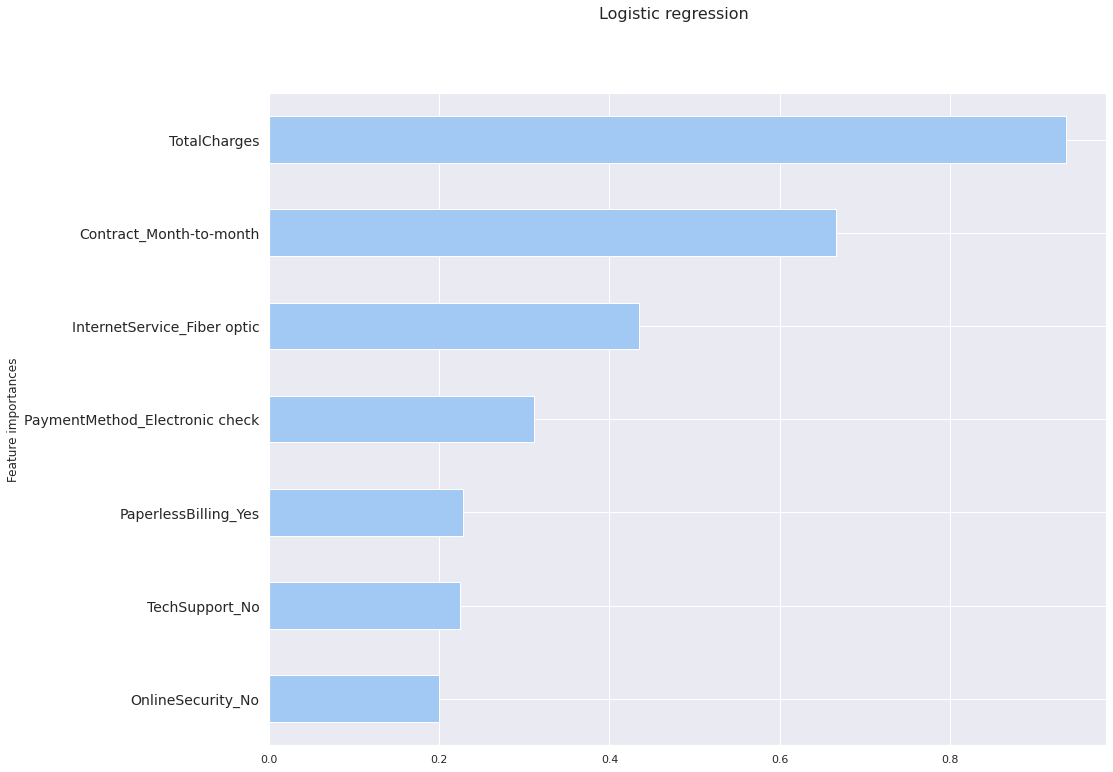

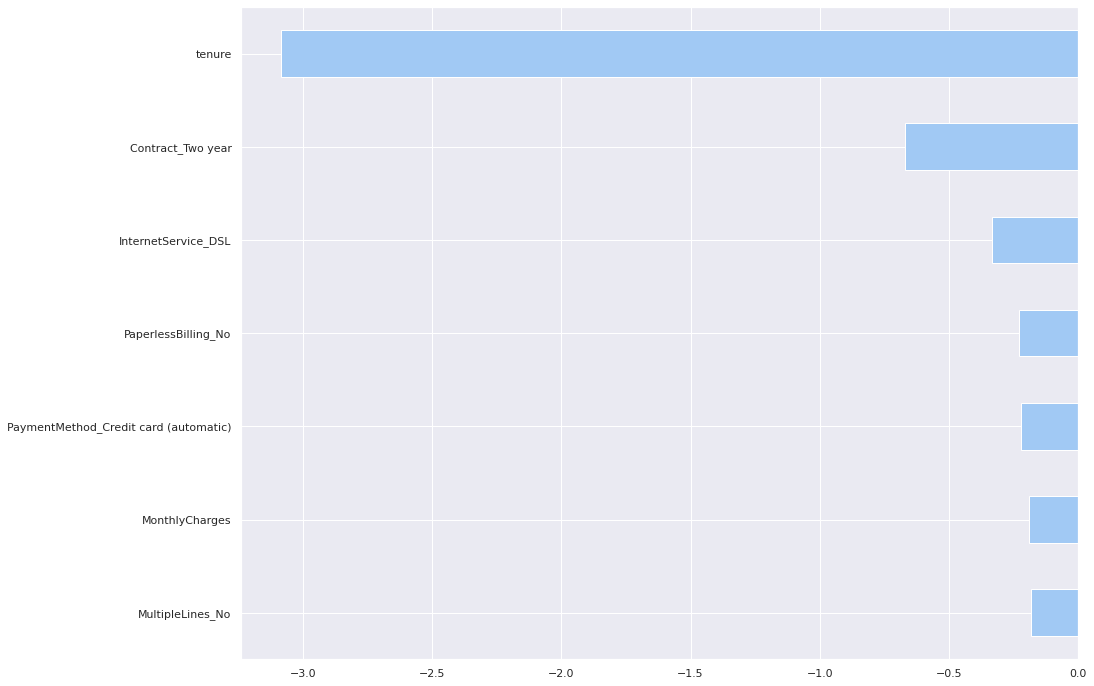

In [ ]:
weights = pd.Series(modelLR.coef_[0], index=x.columns.values) # Stores all important features for later use

plt.ylabel('Feature importances', fontsize=12) # Set ylabel
plt.yticks(fontsize=14) # set size of yticks
plt.suptitle('Logistic regression', fontsize=16) # set title
weights.sort_values(ascending = True)[-7:].plot(kind='barh') # Plotting of the top 7 features
plt.show() # Show graph
weights.sort_values(ascending = False)[-7:].plot(kind='barh') # Plotting of the bottom 7 features
plt.show() # Show graph

## Decision tree

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) # Setup of the training and testing sets

modelDT = DecisionTreeClassifier(random_state=0) # Setup of LR classifier with specified parameters
modelDT.fit(x_train,y_train) # Fitting the model to the appropriate sets

testPredict = modelDT.predict(x_test) # Run a prediction test on x_test set
print(metrics.accuracy_score(y_test, testPredict)) # Prints a general accuracy score of the logical regression

0.72555990046214


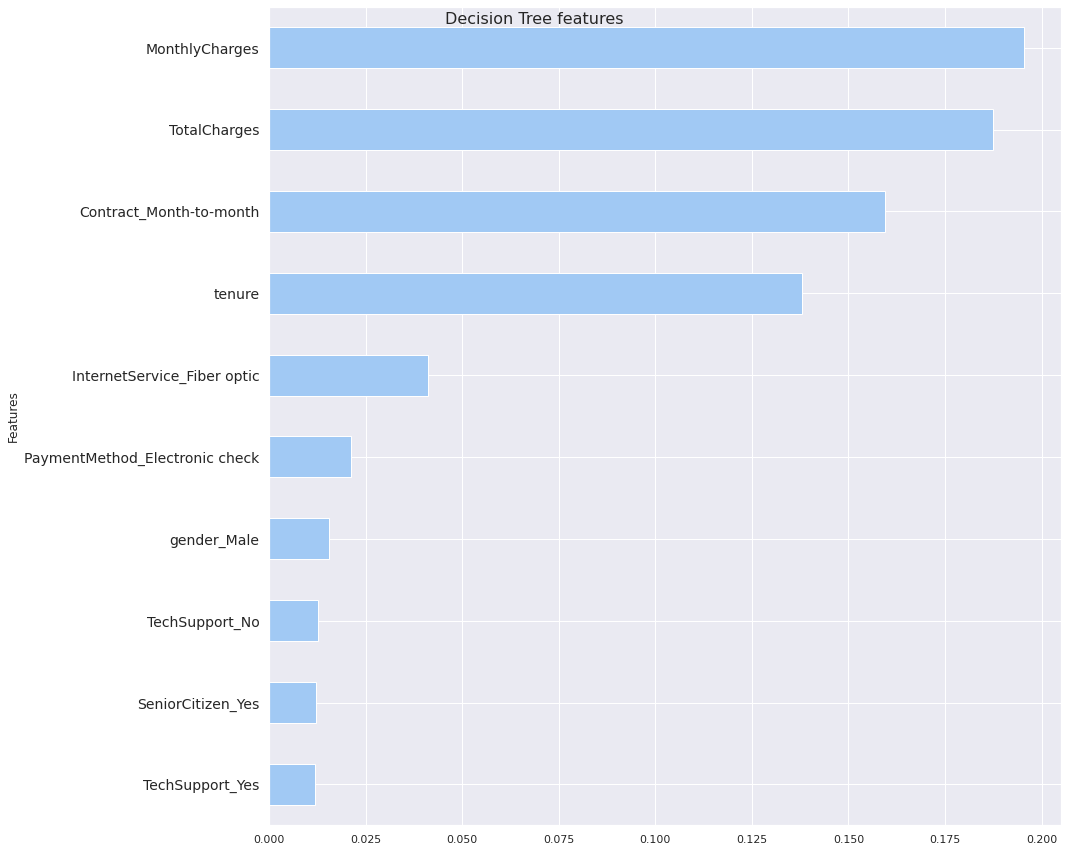

In [ ]:
featureImportances = pd.Series(modelDT.feature_importances_, index=x.columns.values) # Stores all features for later use
plt.suptitle('Decision Tree features', fontsize=16) # set title
plt.ylabel('Features', fontsize=12) # Set ylabel
plt.rcParams["figure.figsize"] = (8,6) # Set size of the figure
featureImportances.sort_values(ascending = True)[-10:].plot(kind='barh') # plotting of the bar graph of features
plt.yticks(fontsize=14) # Set size of yticks
plt.tight_layout() # Sets the layout to tight
plt.show() # Display the graph

## Random forest

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0) # Setup of the training and testing sets

modelRF = RandomForestClassifier(n_estimators=420, max_depth=None, random_state=0) # Setup of RF classifier with specified parameters
modelRF.fit(x_train,y_train) # Fitting the model to the appropriate sets

testPredict = modelRF.predict(x_test) # Run a prediction test on x_test set
print(metrics.accuracy_score(y_test, testPredict)) # Prints a general accuracy score of the logical regression

0.7916814788482047


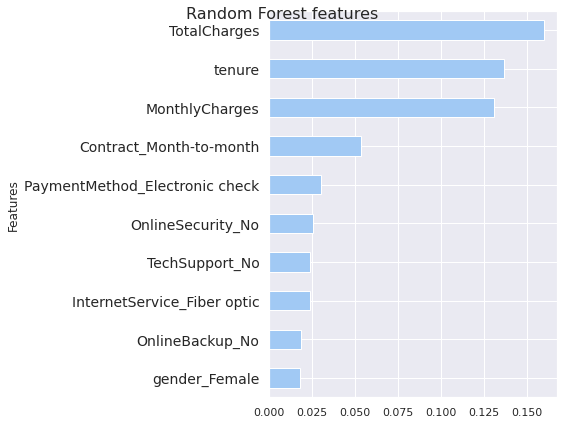

In [ ]:
featureImportances = pd.Series(modelRF.feature_importances_, index=x.columns.values) # Stores all features for later use
plt.suptitle('Random Forest features', fontsize=16) # set title
plt.ylabel('Features', fontsize=12) # Set ylabel
plt.rcParams["figure.figsize"] = (8,6) # Set size of the figure
featureImportances.sort_values(ascending = True)[-10:].plot(kind='barh') # plotting of the bar graph of features
plt.yticks(fontsize=14) # Set size of yticks
plt.tight_layout() # Sets the layout to tight
plt.show() # Display the graph

# Evaluation

In [ ]:
def crossVal(models): # Function to apply the cross validation score
  results = dict() # variable to store the results of the cross validation score
  for name, model in models: # for loop to iterate through models
    kfold = KFold(n_splits=8) # Setup of kfold along with # of splits
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy') # Calculate cross-val score
    results[name]=(cv_results.mean()) # apply the mean of the score to the results variable

  print(results) # Print raw result
  print("\n"+"%0.2f accuracy with a standard deviation of %0.2f" % (cv_results.mean(), cv_results.std())) # Print result as percentage with deviation


In [ ]:
data = pd.read_csv("churn.csv") # Create DataFrame variable with the dataset

data["Churn"] = data["Churn"].map({"No":0, "Yes":1})
data["gender"] = data["gender"].map({"Male":0, "Female":1})

# Create Yearly or monthly Contract column - Binary No(0) or yes(1)
data["Contract"] = data["Contract"].replace(['Month-to-month'], 0)
data["Contract"] = data["Contract"].replace(['One year', 'Two year'], 1)
# Create tech or no techsupport column - Binary No(0) or yes(1)
data["TechSupport"] = data["TechSupport"].replace(['No internet service', 'No'], 0)
data["TechSupport"] = data["TechSupport"].replace(['Yes'], 1)
# Create online backup or no backup column - Binary No(0) or yes(1)
data["OnlineBackup"] = data["OnlineBackup"].replace(['No internet service', 'No'], 0)
data["OnlineBackup"] = data["OnlineBackup"].replace(['Yes'], 1)


data["Contract"] = data["Contract"].astype(int)
data["TechSupport"] = data["TechSupport"].astype(int)
data["OnlineBackup"] = data["OnlineBackup"].astype(int)

data.drop(labels=["SeniorCitizen","Partner","Dependents","tenure","PhoneService", "MultipleLines","InternetService","OnlineSecurity","DeviceProtection","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod"], axis = 1, inplace = True)

y = data['Churn']
#drop y for calc
data = data.drop('Churn',axis = 1)

x_train, x_test, y_train, y_test = train_test_split(data,y, test_size=0.4, random_state=42) # Setup of training and testing sets

models = []
models.append(('LR', LogisticRegression(max_iter=150)))

crossVal(models) # Call to the crossVal function to calculate cross-validation score


{'LR': 0.7900103681501927}

0.79 accuracy with a standard deviation of 0.02


ConfidenceInterval(low=array([4.99741969e-01, 4.71420564e-01, 4.49236339e-01, 4.95530820e-01,
       2.97804785e+01, 2.22863516e+03]), high=array([4.99999980e-01, 4.78545106e-01, 4.58600982e-01, 4.98486682e-01,
       3.03812433e+01, 2.29992478e+03]))


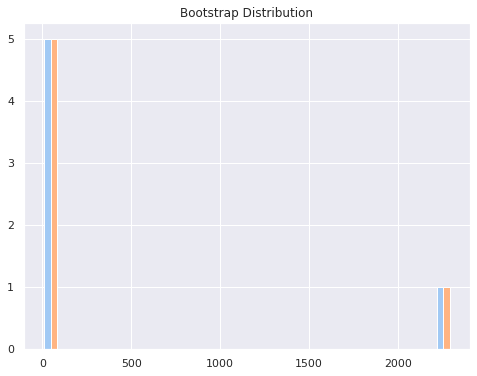

In [ ]:
data = pd.read_csv("churn.csv")
rng = np.random.default_rng()
# data= dist.rvs(size=100, random_state=rng)
data["Churn"] = data["Churn"].map({"No":0, "Yes":1})
data["gender"] = data["gender"].map({"Male":0, "Female":1})

# Create Yearly or monthly Contract column - Binary No(0) or yes(1)
data["Contract"] = data["Contract"].replace(['Month-to-month'], 0)
data["Contract"] = data["Contract"].replace(['One year', 'Two year'], 1)
# Create tech or no techsupport column - Binary No(0) or yes(1)
data["TechSupport"] = data["TechSupport"].replace(['No internet service', 'No'], 0)
data["TechSupport"] = data["TechSupport"].replace(['Yes'], 1)
# Create online backup or no backup column - Binary No(0) or yes(1)
data["OnlineBackup"] = data["OnlineBackup"].replace(['No internet service', 'No'], 0)
data["OnlineBackup"] = data["OnlineBackup"].replace(['Yes'], 1)


data["Contract"] = data["Contract"].astype(int)
data["TechSupport"] = data["TechSupport"].astype(int)
data["OnlineBackup"] = data["OnlineBackup"].astype(int)

data.drop(labels=["SeniorCitizen","Partner","Dependents","tenure","PhoneService", "MultipleLines","InternetService","OnlineSecurity","DeviceProtection","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod"], axis = 1, inplace = True)

y = data['Churn']
#drop y for calc
data = data.drop('Churn',axis = 1)
data = (data,)  # samples must be in a sequence
res = bootstrap(data, np.std, n_resamples=100, batch = 100, confidence_level=0.95,
                         random_state=rng, method='percentile')
#view 95% boostrapped confidence interval
print(res.confidence_interval)

fig, ax = plt.subplots()
ax.hist(res.confidence_interval, bins=25)
ax.set_title('Bootstrap Distribution')
plt.show()
